In [11]:
###############################################
# Load some useful modules
###############################################

import os,sys

#for netcdf files
from netCDF4 import Dataset

#for numeric functions
import numpy as np

#plotting functions
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter

## Plot mean SSH for the gyre

In [18]:
def mean_ssh(ncfile_avg):

    ncfile = ncfile_avg[:-6] + 'his.nc'
    nc = Dataset(ncfile, 'r')
    nc_avg = Dataset(ncfile_avg, 'r')

    x = nc.variables['x_rho'][:,:]*1e-3
    y = nc.variables['y_rho'][:,:]*1e-3
    zeta = nc_avg.variables['zeta'][-1,:,:]

    print nc_avg.variables['scrum_time'][-1]/(360*24*3600)

    nc.close()
    nc_avg.close()

    plt.contourf(x,y,zeta,100,cmap=plt.cm.spectral); 
    CS1=plt.contour(x,y,zeta,10,colors = ('k',)); 

    plt.clabel(CS1, fmt = '%2.2f', colors = 'k', fontsize=6)  ; 
    plt.xlabel(r'x [km]',fontsize=18)
    plt.ylabel(r'y [km]',fontsize=18)
    plt.title(r'SSH',verticalalignment='bottom', fontsize=20)



2.5


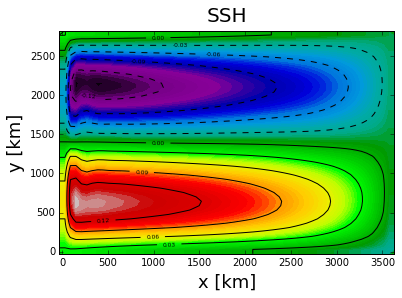

In [20]:
folder = './'
ncfile_avg = folder + 'case1/basin_avg.nc'
mean_ssh(ncfile_avg)


## Define some plotting functions

In [21]:
#define a plotting function once
fontsize0 = 6
fontsize1 = 10
fontsize2 = format(14)
fontsize3 = format(18)
font = {'size'   : fontsize1}
plt.rc('font', **font)

def plot_common(ax1,x,y,myvar,title,panel):
    my_cmap= plt.cm.bwr
    levels = np.arange(-1,1.01,0.01)
    joe = plt.pcolormesh(x,y,myvar,vmin=levels.min(),vmax=levels.max(),cmap=my_cmap,rasterized=True);
    t1 = plt.text(0.9, 0.21,"{0:.1f}".format(np.nansum(myvar[:,:])), fontsize=fontsize0,  horizontalalignment='right', verticalalignment='center', transform = ax1.transAxes)
    t1 = plt.text(0.9, 0.11,title, fontsize=fontsize1,  horizontalalignment='right', verticalalignment='center', transform = ax1.transAxes)
    ax1.xaxis.set_major_formatter( NullFormatter() )
    ax1.yaxis.set_major_formatter( NullFormatter() )
    plt.axis([x.min(), x.max(), y.min(), y.max()])
    return joe

def panels9(x,y,var1,var2,var3,var4,var5,var6,var7,var8,var9,coeflev=0.5e-9,titles=[' ']*10,title=' ',wbc=False):
    if wbc: fig = plt.figure(figsize=(6.0,6.0)); 
    else: fig = plt.figure(figsize=(12.0,8.0)); 
    ############################################################
    ax1 = fig.add_subplot(331,axisbg='Gainsboro')    
    joe = plot_common(ax1,x,y,var1/coeflev,titles[0],'a')
    ############################################################
    ax1 = fig.add_subplot(332,axisbg='Gainsboro')
    plt.title(title)
    plot_common(ax1,x,y,var2/coeflev,titles[1],'b')
    ############################################################
    ax1 = fig.add_subplot(333,axisbg='Gainsboro')    
    plot_common(ax1,x,y,var3/coeflev,titles[2],'c')
    ############################################################
    ax1 = fig.add_subplot(334,axisbg='Gainsboro')
    plot_common(ax1,x,y,var4/coeflev,titles[3],'d')
    ############################################################
    ax1 = fig.add_subplot(335,axisbg='Gainsboro')    
    plot_common(ax1,x,y,var5/coeflev,titles[4],'e')
    ############################################################
    ax1 = fig.add_subplot(336,axisbg='Gainsboro')    
    plot_common(ax1,x,y,var6/coeflev,titles[5],'f')
    ############################################################
    ax1 = fig.add_subplot(337,axisbg='Gainsboro')    
    plot_common(ax1,x,y,var7/coeflev,titles[6],'g')
    ############################################################
    ax1 = fig.add_subplot(338,axisbg='Gainsboro')
    plot_common(ax1,x,y,var8/coeflev,titles[7],'h')
    ############################################################
    ax1 = fig.add_subplot(339,axisbg='Gainsboro')
    plot_common(ax1,x,y,var9/coeflev,titles[8],'i')    
    ############################################################
    plt.subplots_adjust(right=0.9)
    plt.subplots_adjust(wspace=0.01,hspace=0.01)
    cbar_ax = fig.add_axes([0.94, 0.32, 0.02, 0.30])
    fig.colorbar(joe, cax=cbar_ax) 
    ############################################################


## Define vorticity balance

In [22]:
#TEST

ncfile = folder + 'case1/basin_diags_vrt_avg.nc'

nc = Dataset(ncfile,'r')
[nt0,ny,nx] = nc.variables['vrt_hdiff'].shape
nt = nt0-1

print nc.variables['vrt_hdiff'][-nt:,:,:].shape


(1, 51, 61)


In [39]:
def bilan(ncfile,coeflev=0.5e-9):

    nc = Dataset(ncfile,'r')
    [nt0,ny,nx] = nc.variables['vrt_hdiff'].shape
    
    if nt0>100:
        nt = np.max([nt0-20,1])
    else:
        nt = np.max([nt0-2,1])
 
    vrt_hdiff = np.nanmean(nc.variables['vrt_hdiff'][-nt:,:,:],0)
    vrt_adv = np.nanmean(nc.variables['vrt_xadv'][-nt:,:,:],0) + np.nanmean(nc.variables['vrt_yadv'][-nt:,:,:],0) - vrt_hdiff
    vrt_cor = np.nanmean(nc.variables['vrt_cor'][-nt:,:,:],0)
    vrt_prsgrd = np.nanmean(nc.variables['vrt_prsgrd'][-nt:,:,:],0)
    vrt_hmix = np.nanmean(nc.variables['vrt_hmix'][-nt:,:,:],0)
    vrt_vmix = np.nanmean(nc.variables['vrt_vmix'][-nt:,:,:],0)
    vrt_Wind = np.nanmean(nc.variables['vrt_wind'][-nt:,:,:],0)
    vrt_Drag = np.nanmean(nc.variables['vrt_drag'][-nt:,:,:],0)
    
    y = np.arange(vrt_hdiff.shape[0])
    x = np.arange(vrt_hdiff.shape[1])

    mytime0 = nc.variables['scrum_time'][-nt]/(360*24*3600)
    mytime = nc.variables['scrum_time'][-1:]/(360*24*3600)
    print 'averaged between ' + format(mytime0) + ' and ' + format(mytime) + ' years'
    
    vrt_tot = vrt_adv + vrt_hdiff+ vrt_cor + vrt_prsgrd + vrt_hmix + vrt_vmix
    titles = ['Adv', 'Cor', 'Pressure', 'Explicit visc.', 'Interior vert. mix.',\
                         'Implicit visc.', 'Wind', 'Bot. Drag','$\sum$']
    title='barotropic vorticity tendency'
    panels9(x,y,vrt_adv, vrt_cor, vrt_prsgrd, vrt_hmix, vrt_vmix-vrt_Wind-vrt_Drag,\
              vrt_hdiff, vrt_Wind, vrt_Drag,vrt_tot,coeflev=coeflev,titles=titles,title=title)

    
def bilan_wbc(ncfile,coeflev=1.e-8):

    nc = Dataset(ncfile,'r')
    [nt0,ny,nx] = nc.variables['vrt_hdiff'].shape
    
    if nt0>100:
        nt = np.max([nt0-20,1])
    else:
        nt = np.max([nt0-2,1])
    
    y = np.arange(ny/2)
    x = np.arange(nx/4)
    
    vrt_hdiff = np.nanmean(nc.variables['vrt_hdiff'][-nt:,:ny/2,:nx/4] ,0)
    vrt_adv = np.nanmean(nc.variables['vrt_xadv'][-nt:,:ny/2,:nx/4],0)\
            + np.nanmean(nc.variables['vrt_yadv'][-nt:,:ny/2,:nx/4],0) - vrt_hdiff
    vrt_cor = np.nanmean(nc.variables['vrt_cor'][-nt:,:ny/2,:nx/4],0)
    vrt_prsgrd = np.nanmean(nc.variables['vrt_prsgrd'][-nt:,:ny/2,:nx/4],0)
    vrt_hmix = np.nanmean(nc.variables['vrt_hmix'][-nt:,:ny/2,:nx/4],0)
    vrt_vmix = np.nanmean(nc.variables['vrt_vmix'][-nt:,:ny/2,:nx/4],0)
    vrt_Wind = np.nanmean(nc.variables['vrt_wind'][-nt:,:ny/2,:nx/4],0)
    vrt_Drag = np.nanmean(nc.variables['vrt_drag'][-nt:,:ny/2,:nx/4],0)

    mytime0 = nc.variables['scrum_time'][-nt]/(360*24*3600)
    mytime = nc.variables['scrum_time'][-1:]/(360*24*3600)
    #print 'averaged between ' + format(mytime0) + ' and ' + format(mytime) + ' years'
    
    
    vrt_tot = vrt_adv + vrt_hdiff+ vrt_cor + vrt_prsgrd + vrt_hmix + vrt_vmix
    titles = ['Adv', 'Cor', 'Pressure', 'Explicit visc.', 'Interior vert. mix.',\
                         'Implicit visc.', 'Wind', 'Bot. Drag','$\sum$']
    title = 'barotropic vorticity tendency for WBC'
    panels9(x,y,vrt_adv, vrt_cor, vrt_prsgrd, vrt_hmix, vrt_vmix-vrt_Wind-vrt_Drag,\
              vrt_hdiff, vrt_Wind, vrt_Drag,vrt_tot,coeflev=coeflev,titles=titles,wbc=True,title=title)

    

def bilan_ke(ncfile,coeflev=1e9):

    nc = Dataset(ncfile,'r')
    [nt0,ny,nx] = nc.variables['ke_hdiff'].shape
    
    if nt0>100:
        nt = np.max([nt0-20,1])
    else:
        nt = np.max([nt0-2,1])
        
    vrt_rate = np.nanmean(nc.variables['ke_rate'][-nt:,:,:] ,0)
    vrt_hdiff = np.nanmean(nc.variables['ke_hdiff'][-nt:,:,:] ,0)
    vrt_adv = np.nanmean(nc.variables['ke_hadv'][-nt:,:,:],0) + np.nanmean(nc.variables['ke_vadv'][-nt:,:,:],0) - vrt_hdiff
    vrt_prsgrd = np.nanmean(nc.variables['ke_prsgrd'][-nt:,:,:],0) +np.nanmean(nc.variables['ke_cor'][-nt:,:,:],0)
    vrt_hmix = np.nanmean(nc.variables['ke_hmix'][-nt:,:,:],0)
    vrt_vmix = np.nanmean(nc.variables['ke_vmix'][-nt:,:,:],0)+np.nanmean(nc.variables['ke_nudg'][-nt:,:,:],0)
    vrt_Wind = np.nanmean(nc.variables['ke_wind'][-nt:,:,:],0)
    vrt_Drag = np.nanmean(nc.variables['ke_drag'][-nt:,:,:],0)
    
    y = np.arange(vrt_hdiff.shape[0])
    x = np.arange(vrt_hdiff.shape[1])

    mytime0 = nc.variables['scrum_time'][-nt]/(360*24*3600)
    mytime = nc.variables['scrum_time'][-1:]/(360*24*3600)
    #print 'averaged between ' + format(mytime0) + ' and ' + format(mytime) + ' years'
    
    
    vrt_tot = vrt_adv + vrt_hdiff+  vrt_prsgrd + vrt_hmix + vrt_vmix
    titles = ['$dE_k$','Adv' , 'Pressure', 'Explicit visc.', 'Interior vert. mix.',\
                         'Implicit visc.', 'Wind', 'Bot. Drag','$\sum$'] #'$\frac{\partial E_k}{\partial t}$']
    title = 'kinetic energy tendency'
    panels9(x,y,vrt_rate,vrt_adv,  vrt_prsgrd, vrt_hmix, vrt_vmix-vrt_Wind-vrt_Drag,\
              vrt_hdiff, vrt_Wind, vrt_Drag,vrt_tot, coeflev=coeflev,titles=titles,title=title)


# Case 1: Gyre with no beta effect, strong drag, adv, no-slip

2.5
averaged between 2.5 and [2.5] years


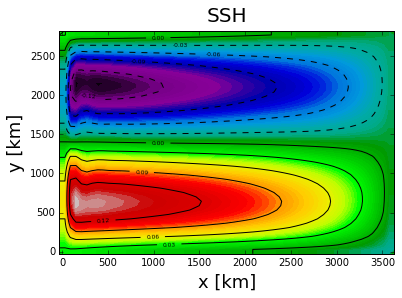

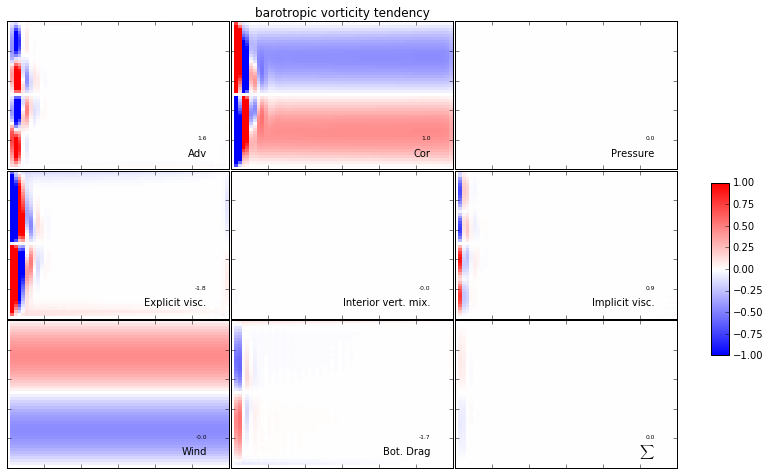

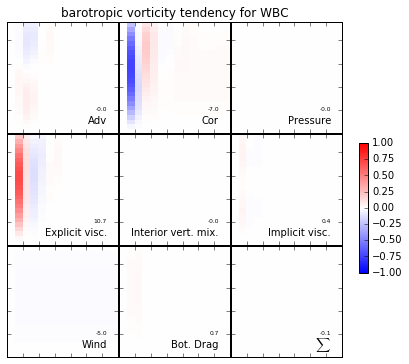

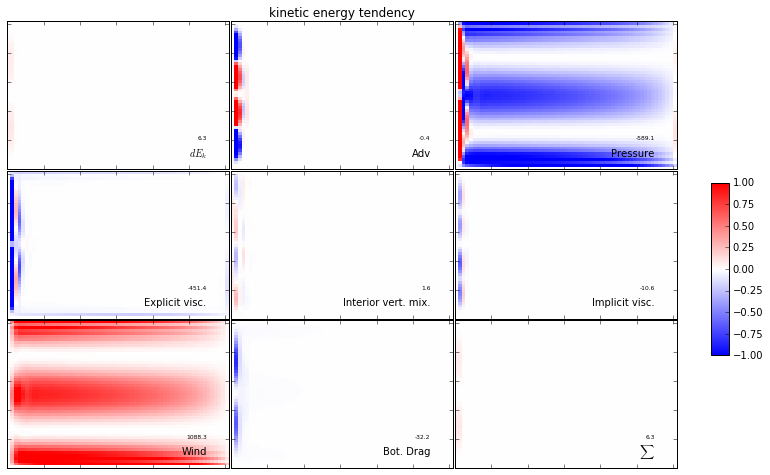

In [40]:
ncfile = folder + 'case1/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case1/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case1/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 1b: Gyre with no beta effect, weak drag, no adv, slip

In [41]:
ncfile = folder + 'case1b/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case1b/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case1b/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e5)

IOError: [Errno 2] No such file or directory: './case1b/basin_his.nc'

# Case 1c: Gyre with no beta effect, strong drag, no adv, slip

17.5
averaged between 12.5 and [17.5] years


/usr/lib/python2.7/dist-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


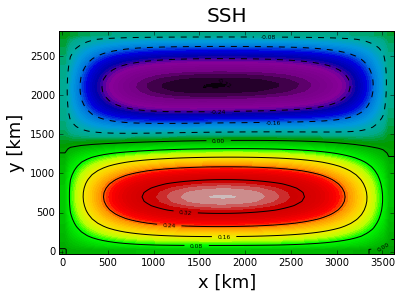

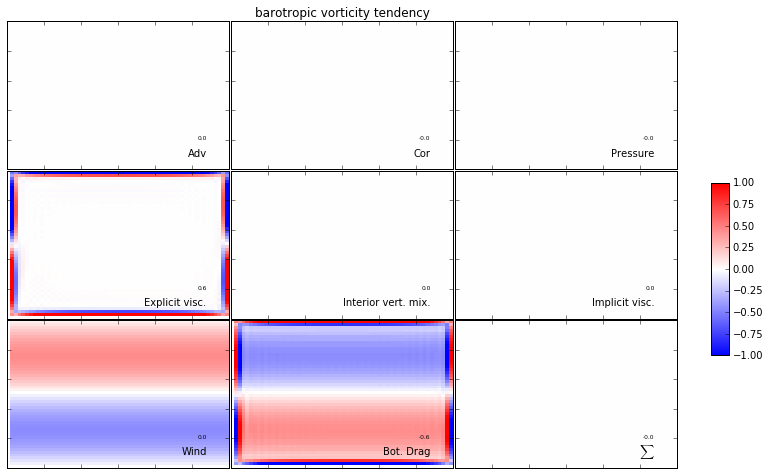

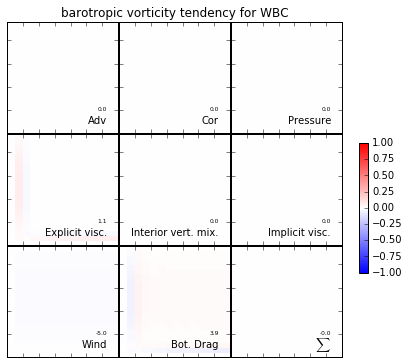

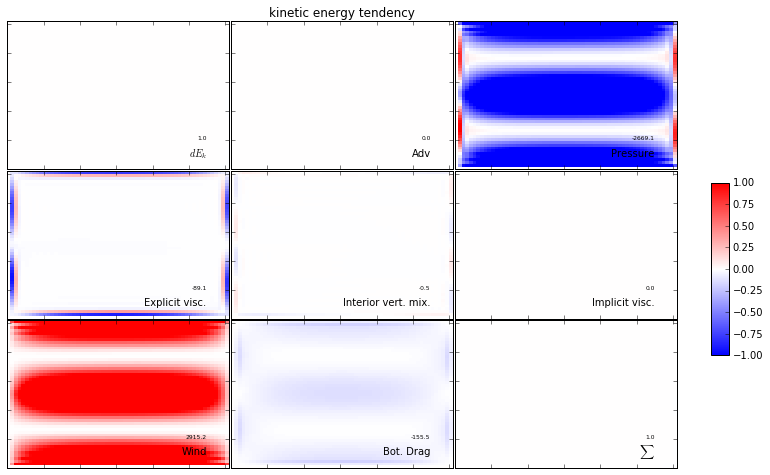

In [11]:
ncfile = folder + 'case1c/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case1c/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case1c/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 1d: Gyre with no beta effect, weak drag, no adv, no-slip

17.5
averaged between 12.5 and [17.5] years


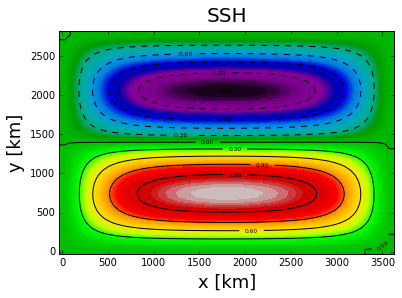

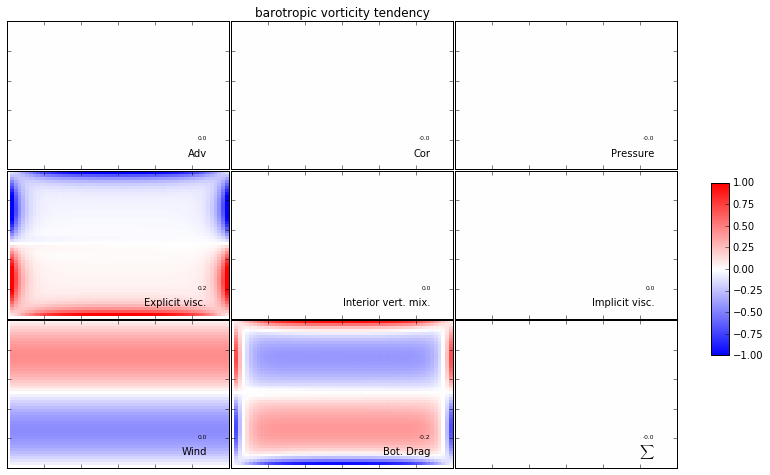

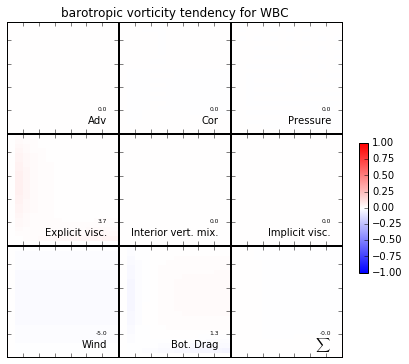

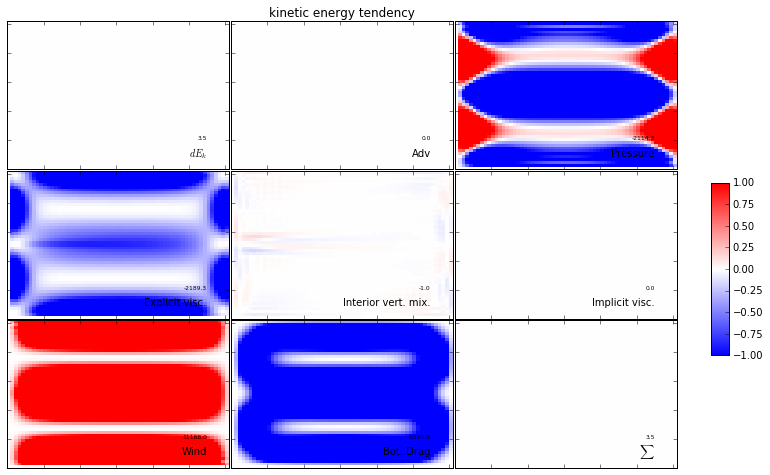

In [12]:
ncfile = folder + 'case1d/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case1d/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case1d/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 2: Gyre with no beta effect, adv, 

17.5
averaged between 12.5 and [17.5] years


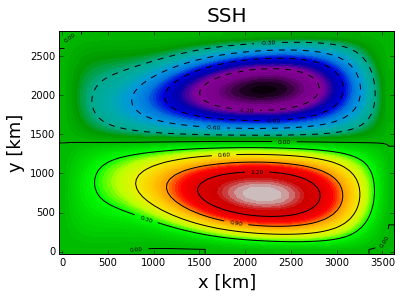

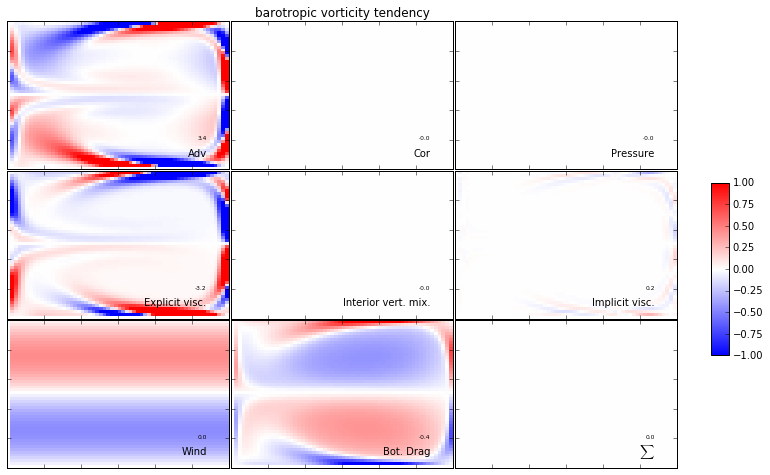

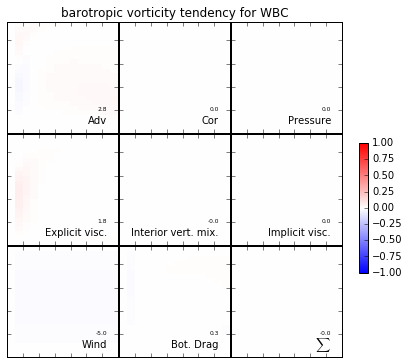

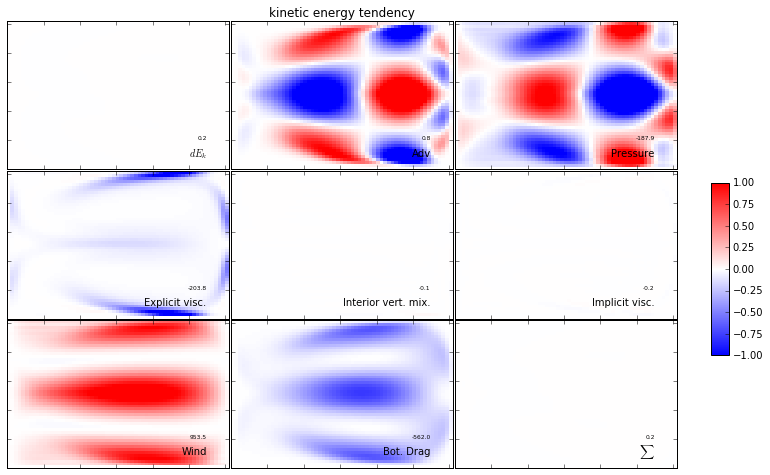

In [103]:
ncfile = folder + 'case2/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case2/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case2/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e5)


# Case 3: Gyre with beta effect

17.5
averaged between 12.5 and [17.5] years


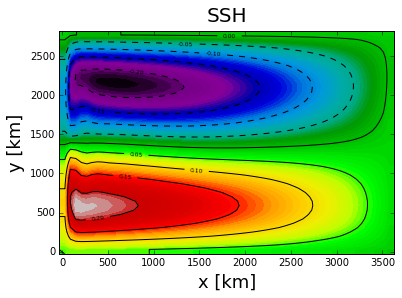

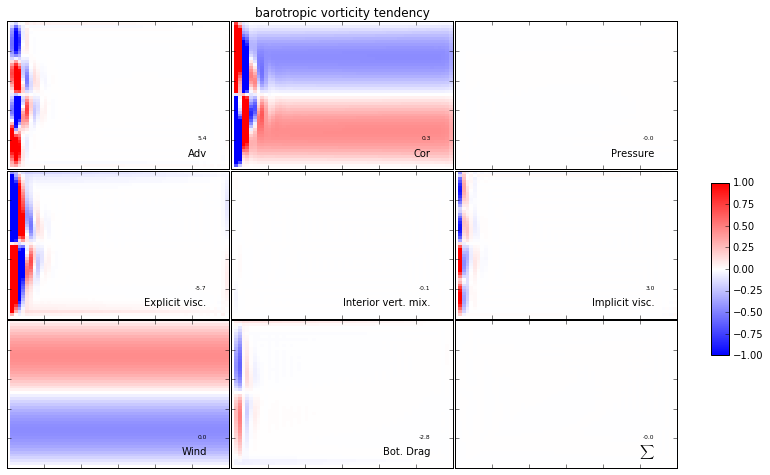

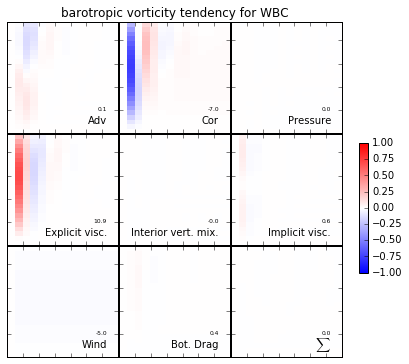

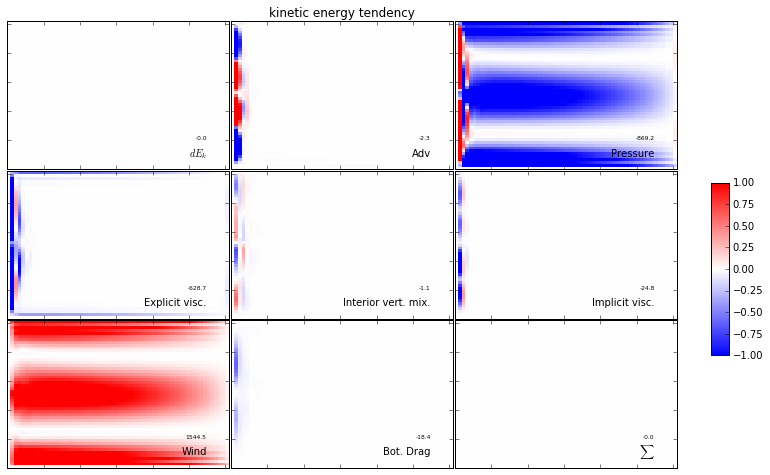

In [104]:
ncfile = folder + 'case3/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case3/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case3/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 3b: Gyre with beta effect, strong drag, no adv, slip

17.5
averaged between 12.5 and [17.5] years


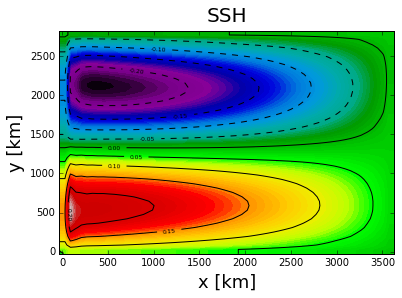

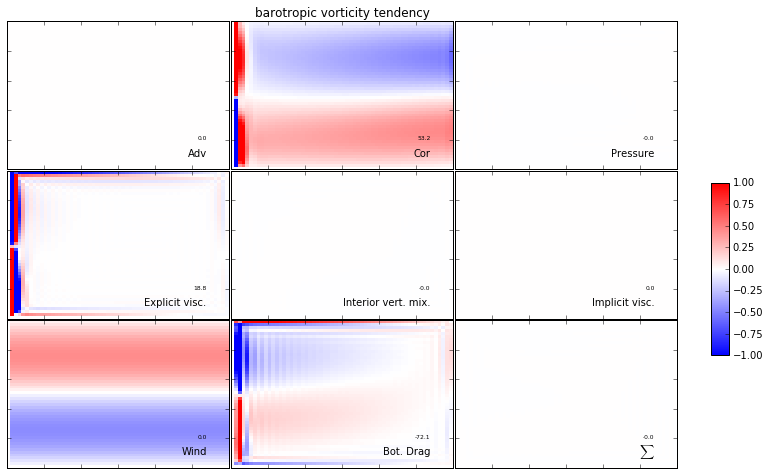

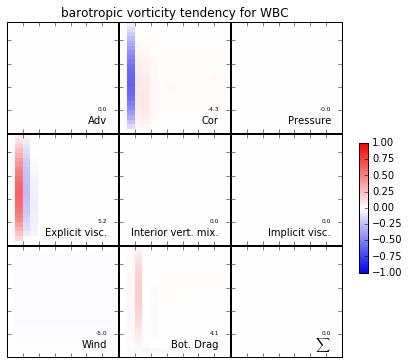

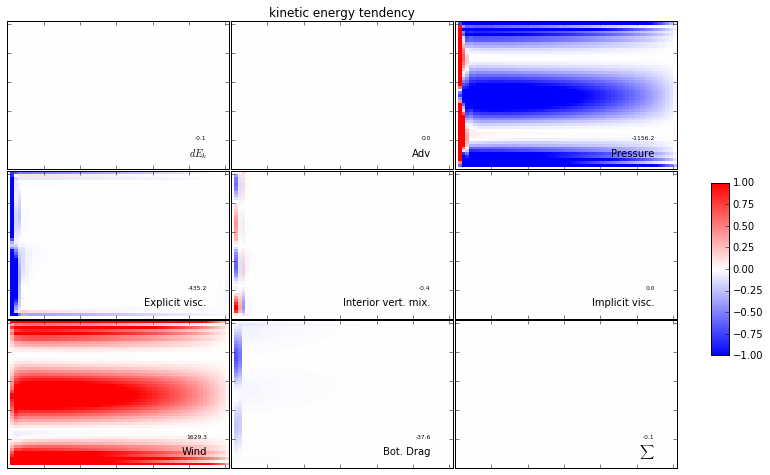

In [122]:
ncfile = folder + 'case3b/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case3b/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case3b/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 3c: Gyre with beta effect, strong drag, no adv, slip

17.5
averaged between 12.5 and [17.5] years


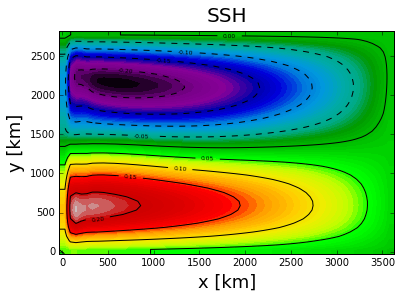

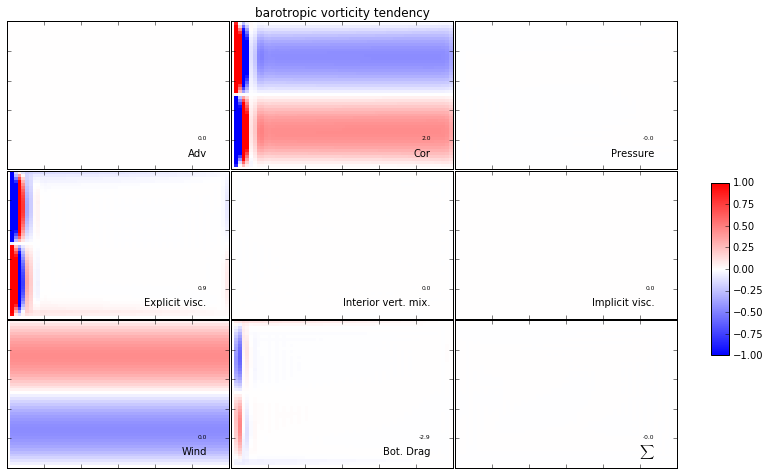

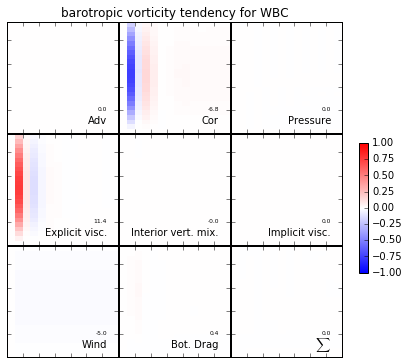

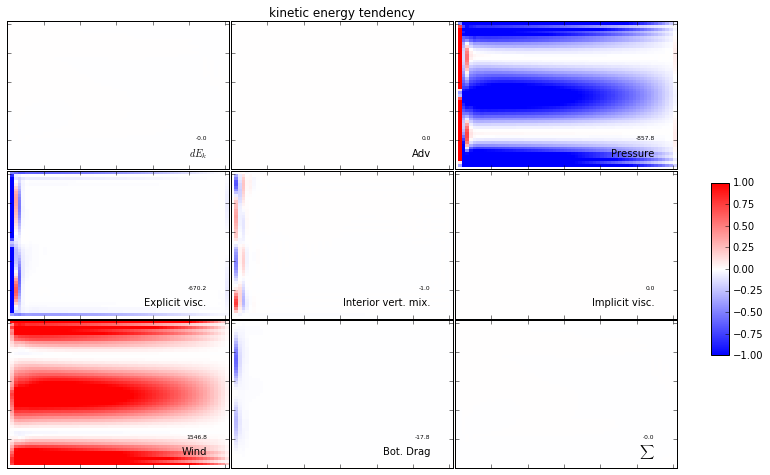

In [124]:
ncfile = folder + 'case3c/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case3c/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case3c/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 4: case 3 with lower viscosity (100), higher resolution (120x100x20)

17.5
averaged between 12.5 and [17.5] years


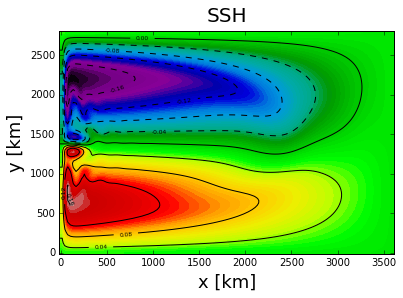

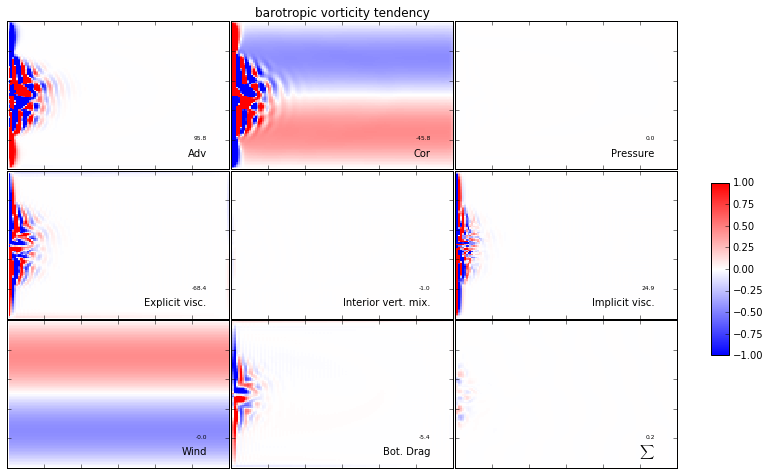

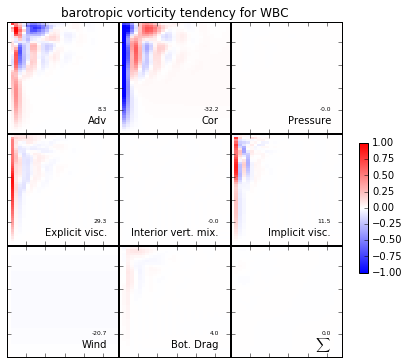

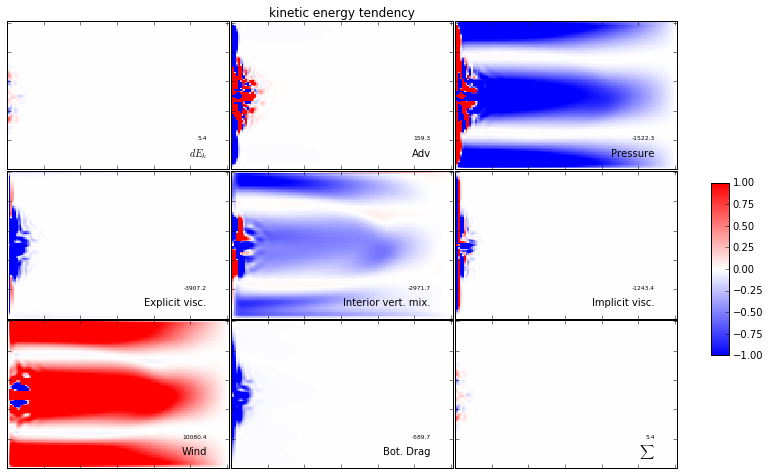

In [106]:
ncfile = folder + 'case4/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case4/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case4/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e3)

# Case 5: case 4 with lower viscosity (10) , higher resolution (240x200x20)

17.5
averaged between 12.5 and [17.5] years


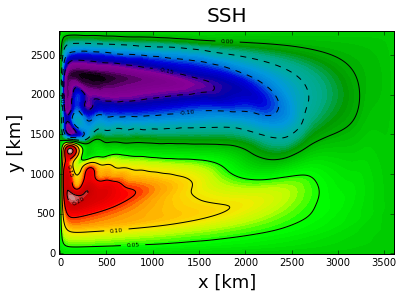

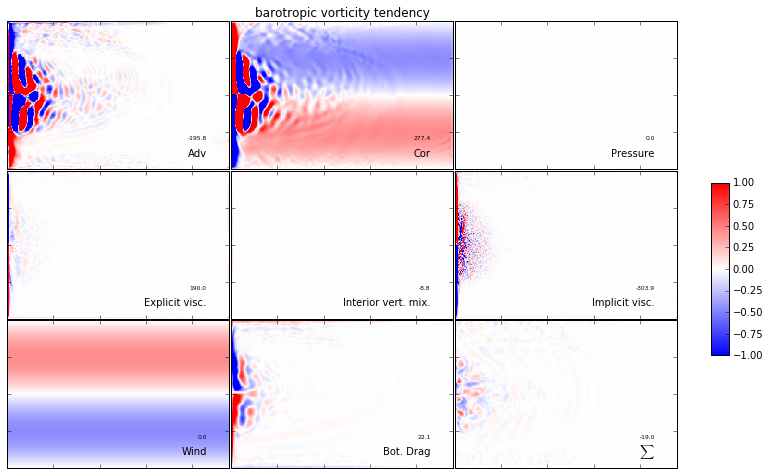

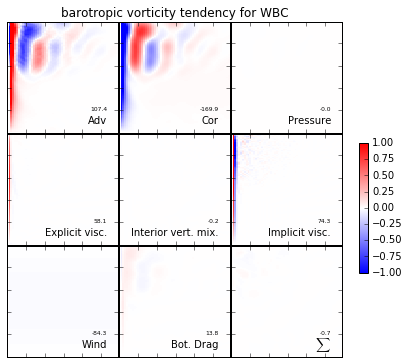

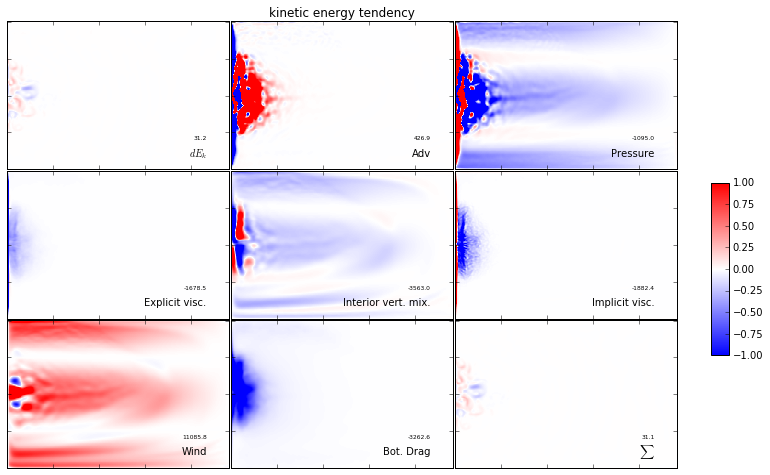

In [107]:
ncfile = folder + 'case5/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case5/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case5/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e3)

# Case 6: case 4 with no implicit visc (C4 schemes) 

17.5
averaged between 12.5 and [17.5] years


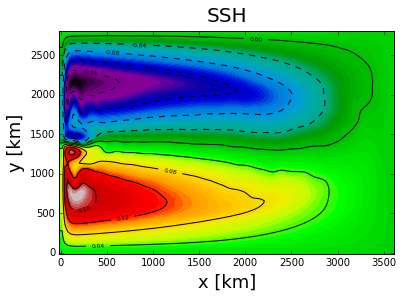

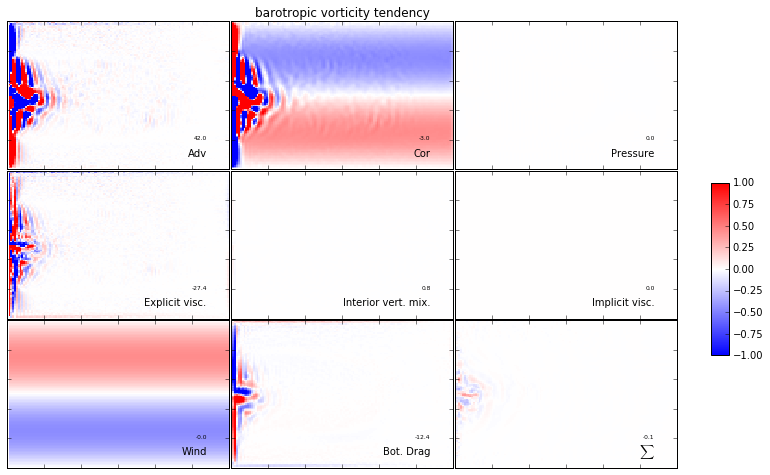

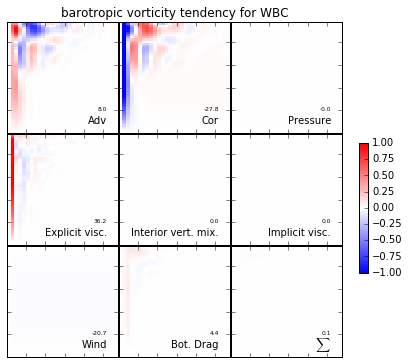

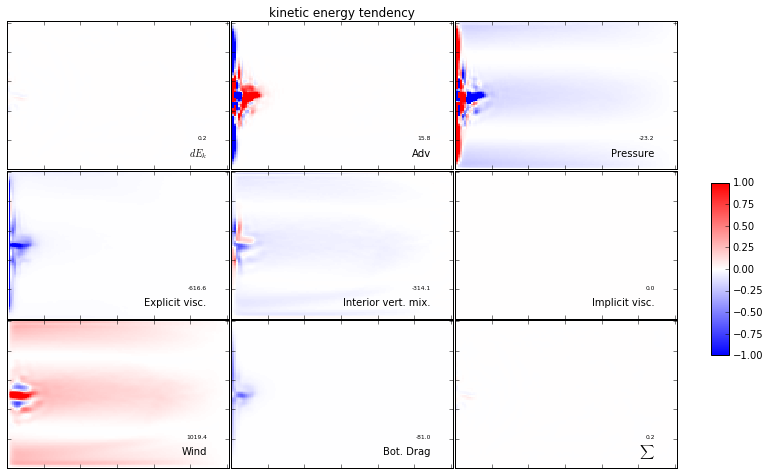

In [108]:
ncfile = folder + 'case6/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case6/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case6/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 7: case 4 with no implicit visc (C2 schemes)

17.5
averaged between 12.5 and [17.5] years


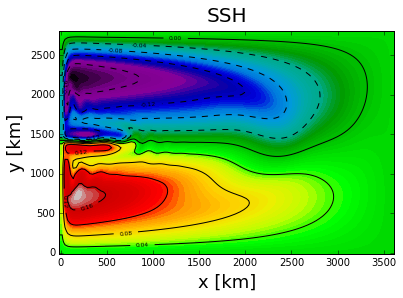

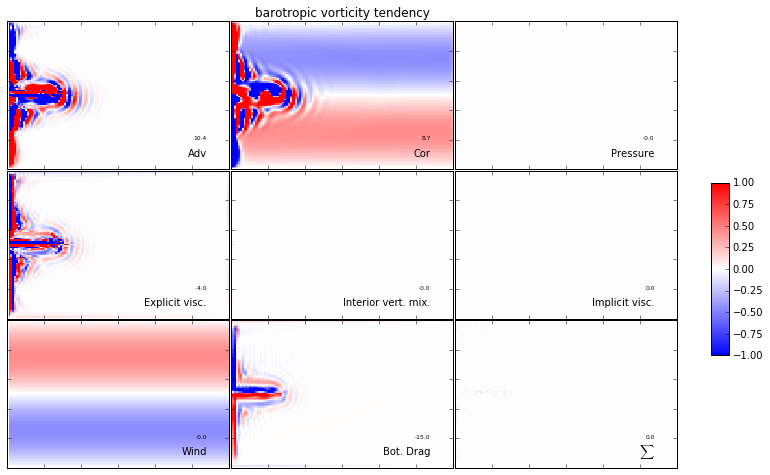

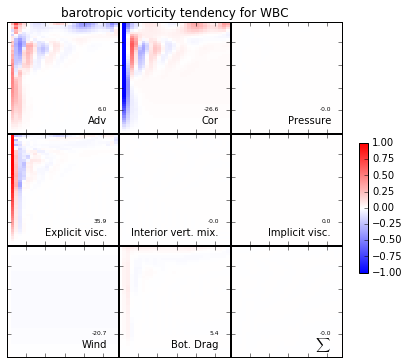

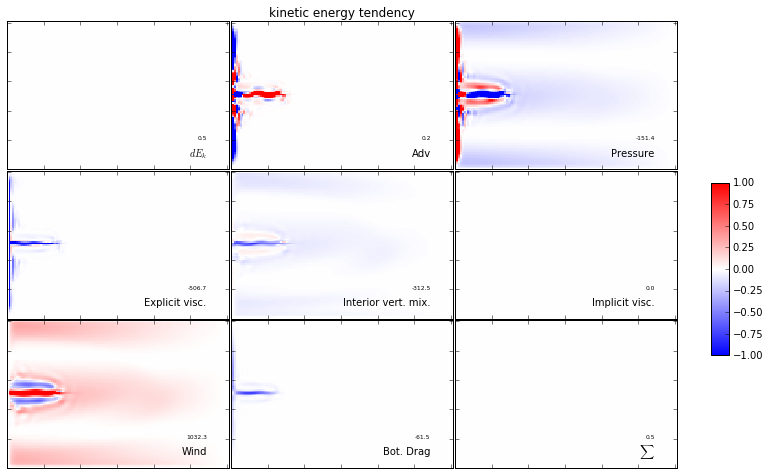

In [109]:
ncfile = folder + 'case7/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case7/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case7/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 8: case 4 with no explicit visc

17.5
averaged between 12.5 and [17.5] years


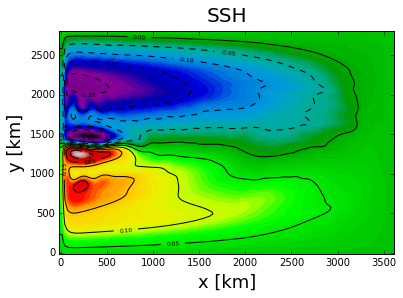

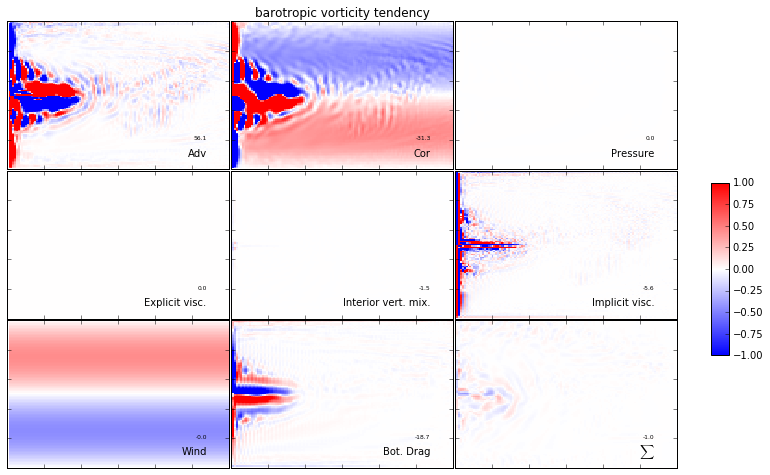

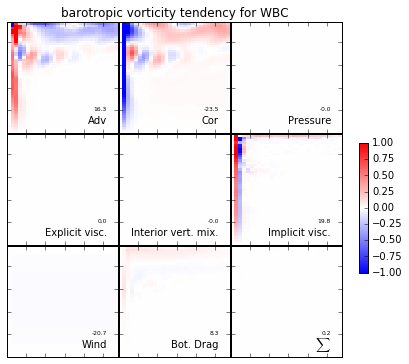

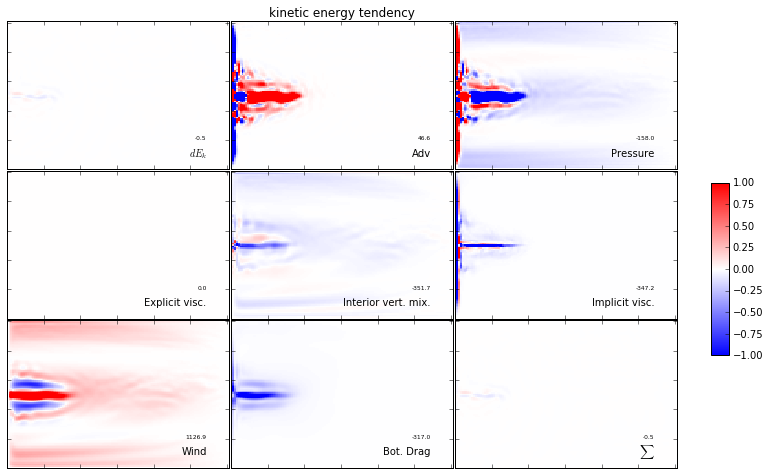

In [110]:
ncfile = folder + 'case8/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case8/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case8/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 9: case 4 with no explicit visc, nor implicit visc

17.5
averaged between 12.5 and [17.5] years


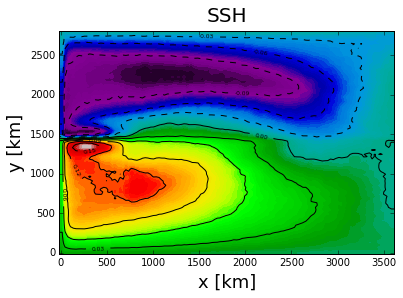

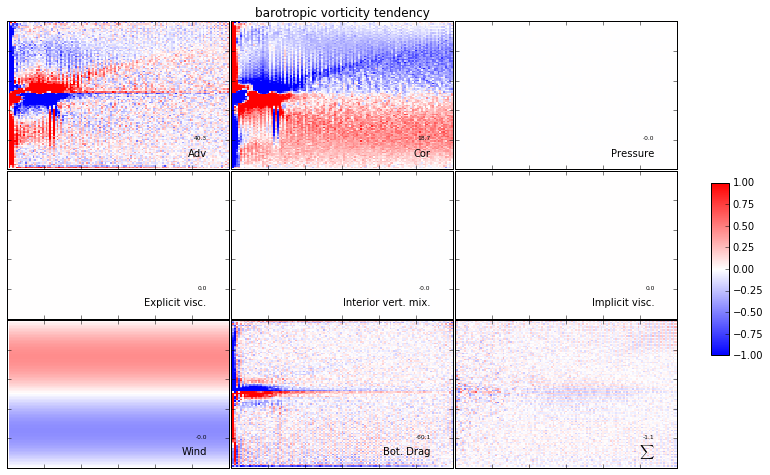

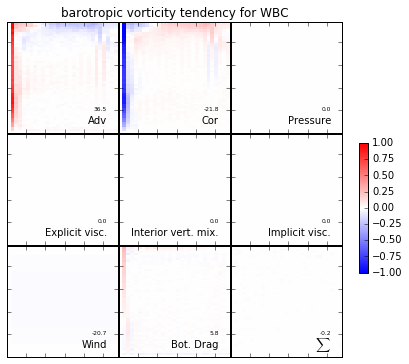

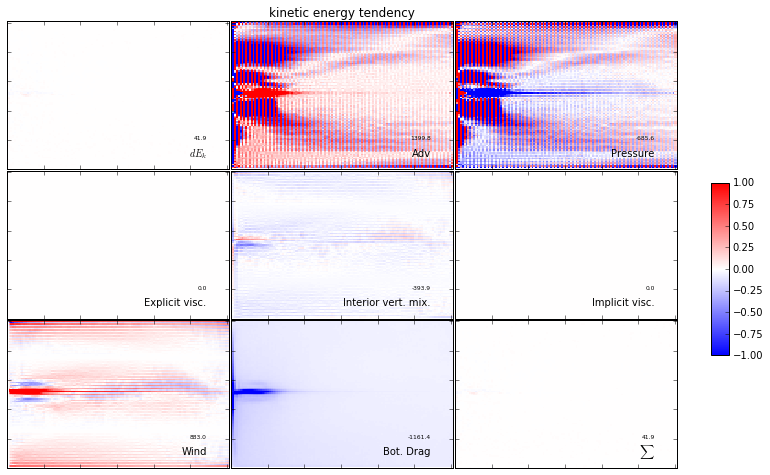

In [111]:
ncfile = folder + 'case9/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case9/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case9/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

17.5


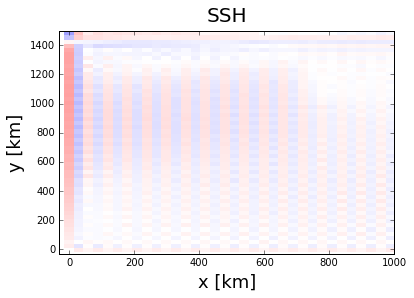

In [112]:

ncfile = folder + 'case9/basin_his.nc'
nc = Dataset(ncfile, 'r')

x = nc.variables['x_rho'][:-1,:-1]*1e-3
y = nc.variables['y_rho'][:-1,:-1]*1e-3

dx = x[1,1] - x[1,0]
dy = y[1,1] - y[0,1]

ncfile = folder + 'case9/basin_avg.nc'
nc_avg = Dataset(ncfile, 'r')

ubar = nc_avg.variables['ubar'][-1,:,:]
vbar = nc_avg.variables['vbar'][-1,:,:]
vrt = (vbar[:,1:]-vbar[:,:-1])/dx-(ubar[1:,:]-ubar[:-1,:])/dy

print nc_avg.variables['scrum_time'][-1]/(360*24*3600)

nc.close()
nc_avg.close()

levels = np.linspace(-1,1,100)*0.5e-1
plt.pcolormesh(x,y,vrt,vmin=levels.min(),vmax=levels.max(),cmap=plt.cm.bwr); 
#CS1=plt.contour(x,y,zeta,10,colors = ('k',)); 

plt.axis([-30, 1000,-30, 1500])
#plt.clabel(CS1, fmt = '%2.2f', colors = 'k', fontsize=6)  ; 
plt.xlabel(r'x [km]',fontsize=18)
plt.ylabel(r'y [km]',fontsize=18)
plt.title(r'SSH',verticalalignment='bottom', fontsize=20)



# Case 9bis: case 4 with no explicit visc, nor implicit visc, fre-slip

17.5
averaged between 12.5 and [17.5] years


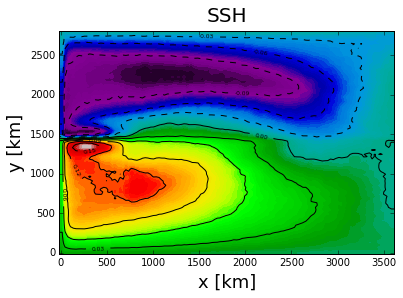

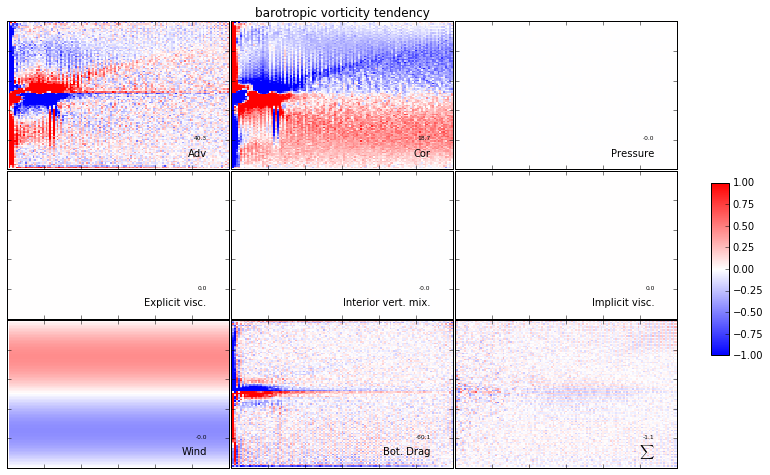

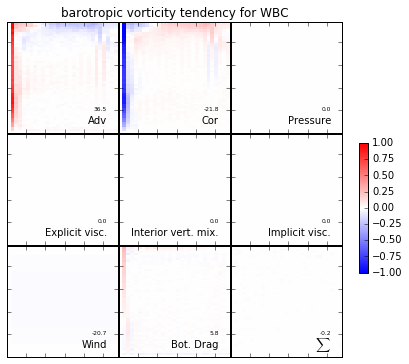

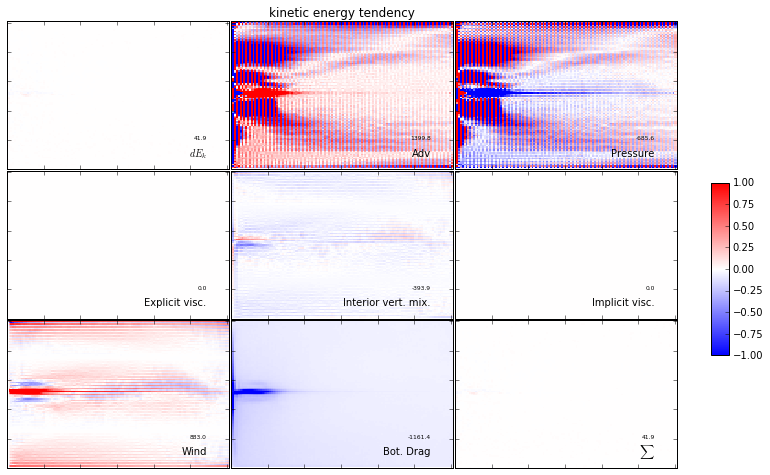

In [113]:
ncfile = folder + 'case9bis/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case9bis/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case9bis/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 10: case 4 with no explicit visc, nor implicit visc, more vertical mixing

17.5
averaged between 12.5 and [17.5] years


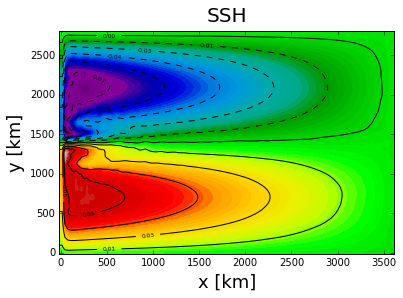

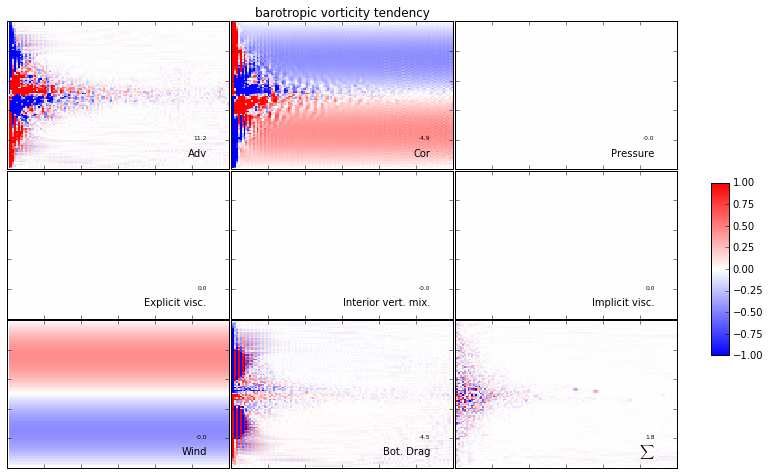

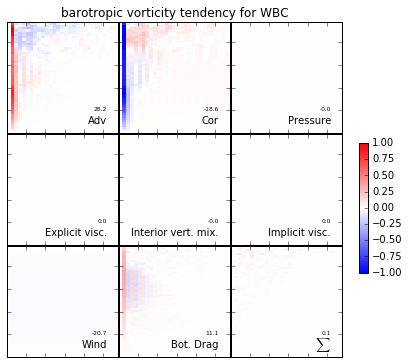

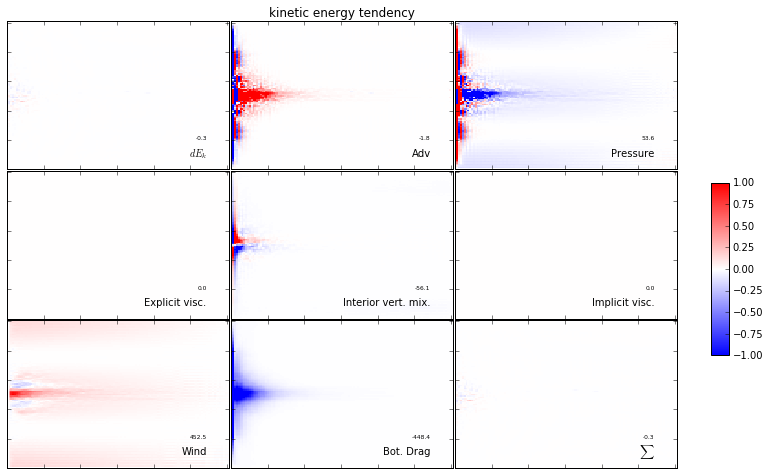

In [114]:
ncfile = folder + 'case10/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case10/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case10/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 11: case 4 with no explicit visc, nor implicit visc, more bottom drag

17.5
averaged between 12.5 and [17.5] years


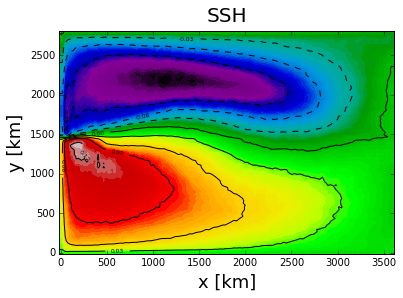

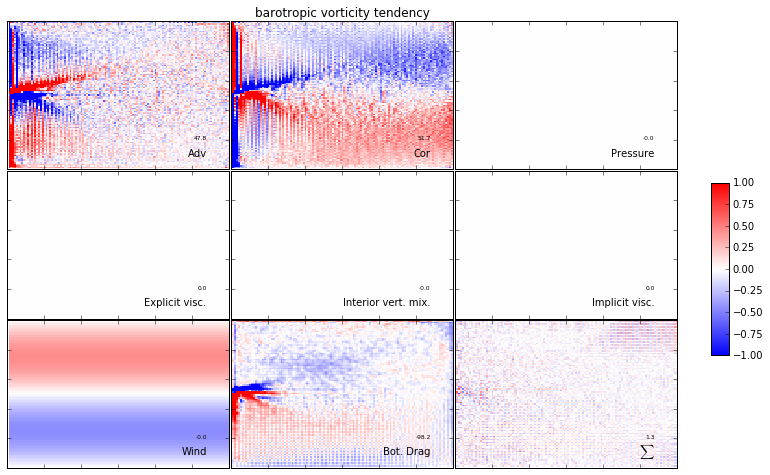

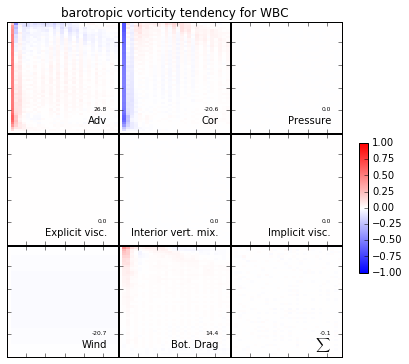

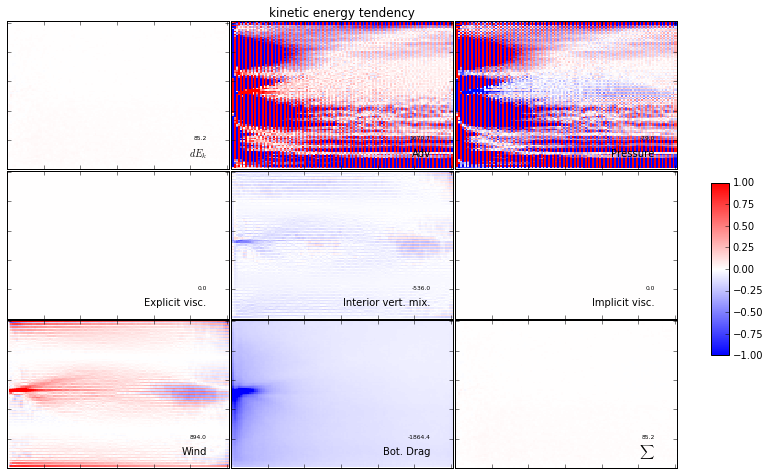

In [115]:
ncfile = folder + 'case11/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case11/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case11/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 15: case 8 with free slip

197.5
averaged between 12.5 and [197.5] years


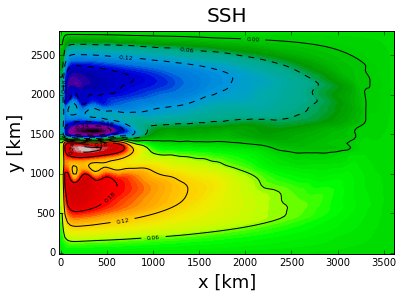

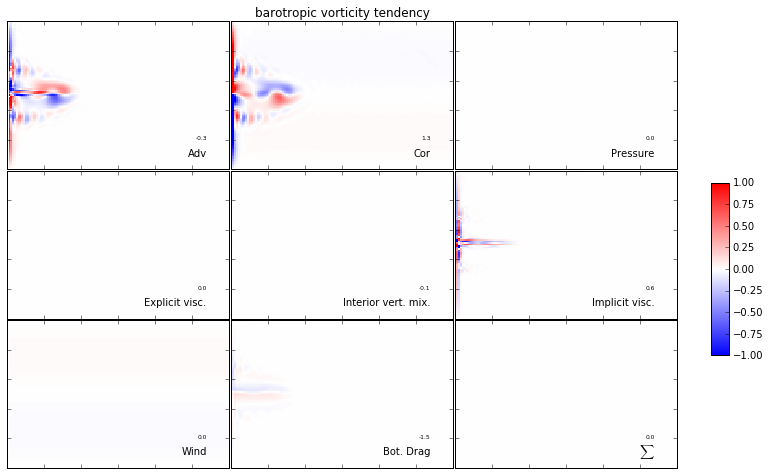

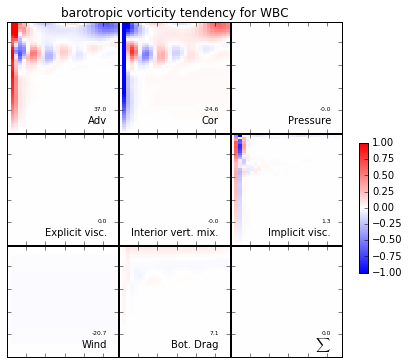

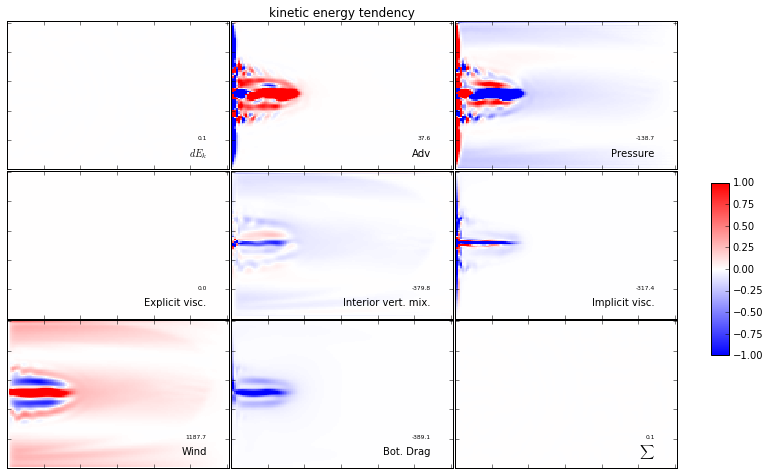

In [116]:
ncfile = folder + 'case15/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case15/basin_diags_vrt_avg.nc'
bilan(ncfile,coeflev=1e-8); bilan_wbc(ncfile)
ncfile = folder + 'case15/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 16: case 8 with free slip and bodyforce on all levels

197.5
averaged between 12.5 and [197.5] years


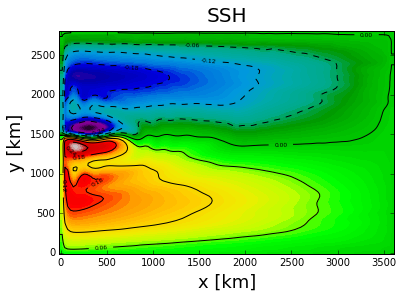

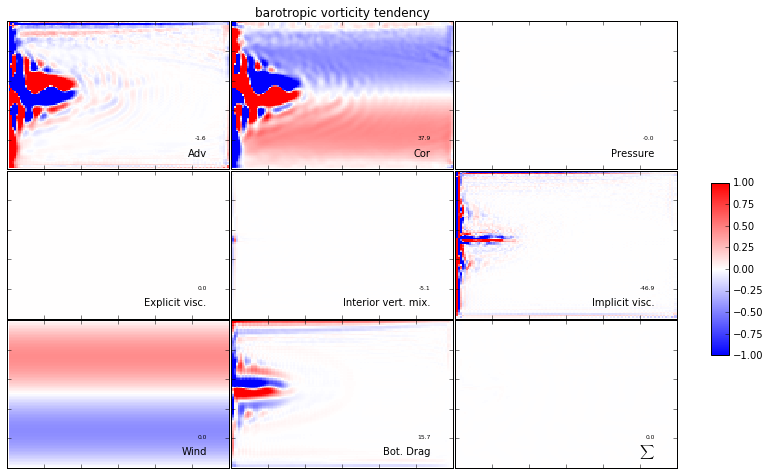

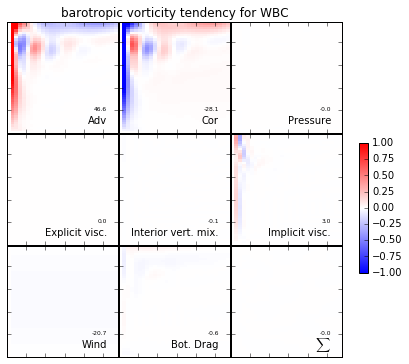

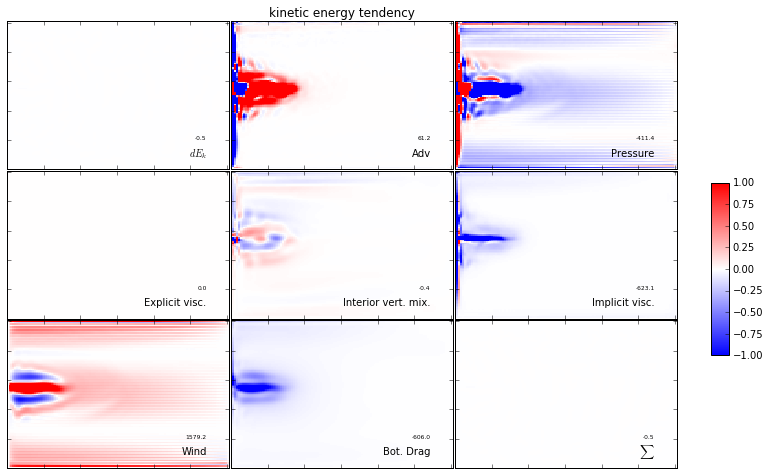

In [117]:
ncfile = folder + 'case16/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case16/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case16/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 12: case 4 with no explicit visc. and topography

17.5
averaged between 12.5 and [17.5] years


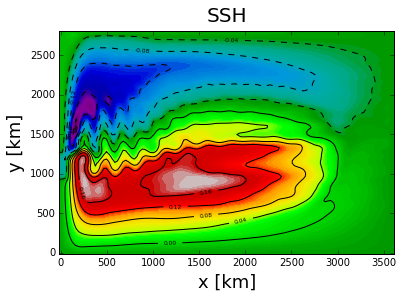

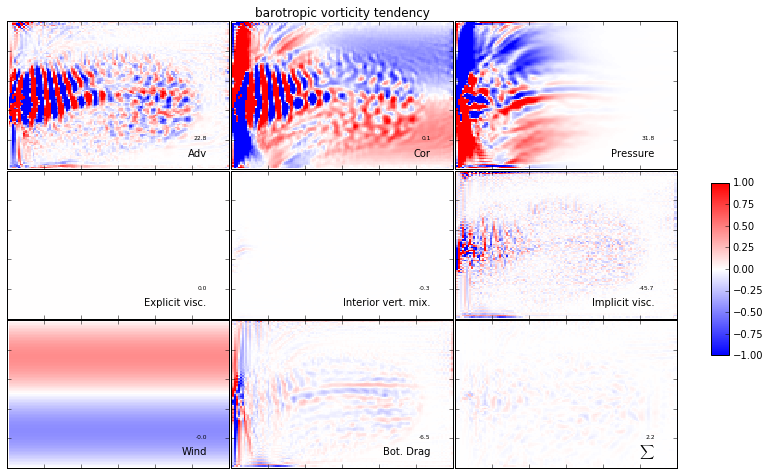

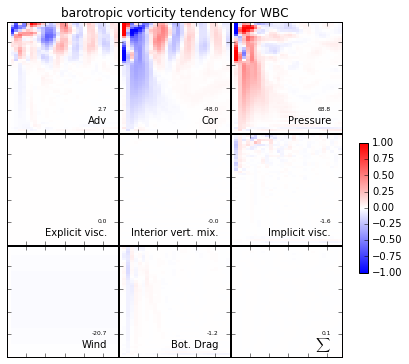

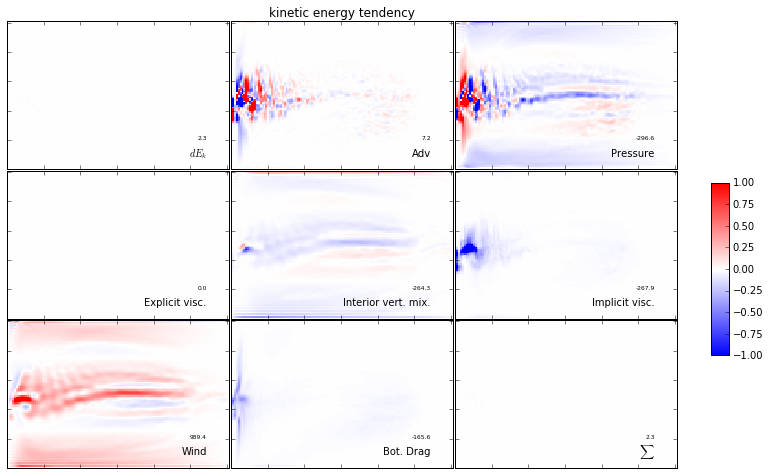

In [118]:
ncfile = folder + 'case12/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case12/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case12/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 13: case 12 with no bodyforce

437.499983539
averaged between 12.5 and [437.49998353909467] years


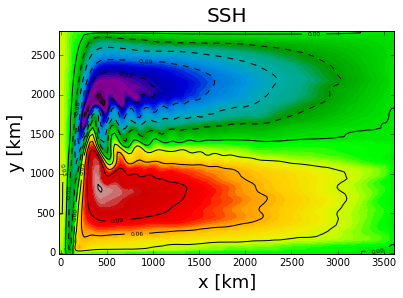

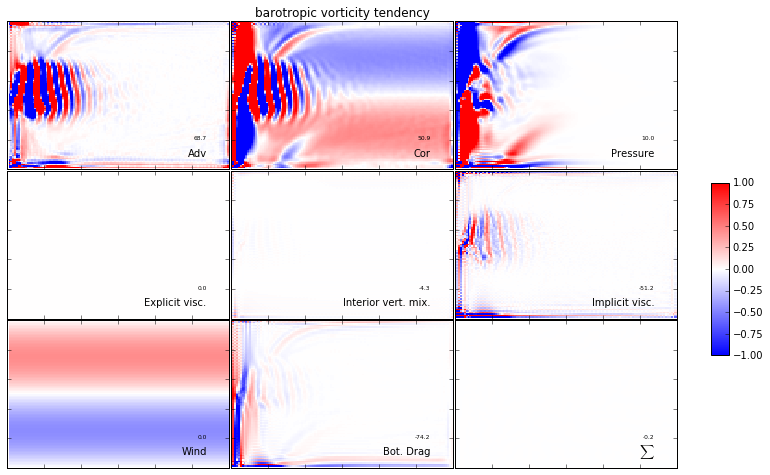

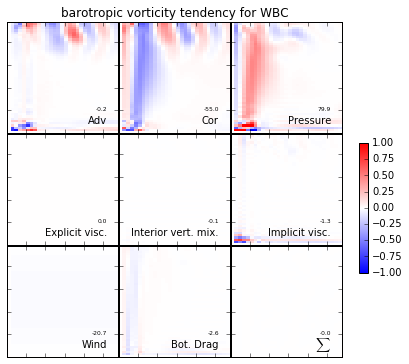

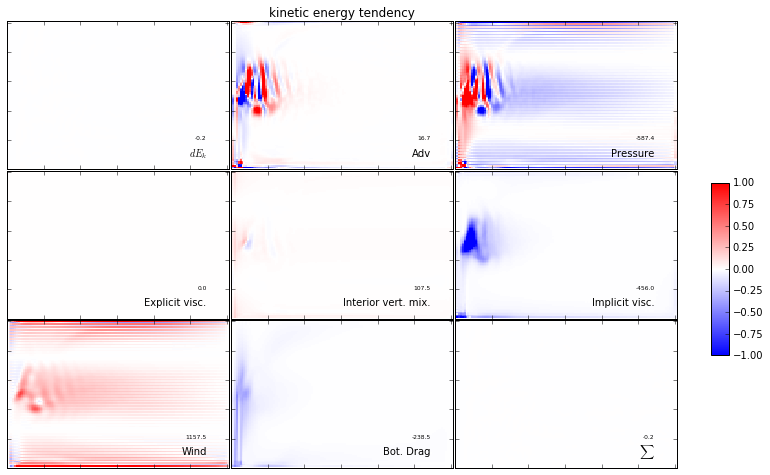

In [119]:
ncfile = folder + 'case13/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case13/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case13/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)



# Case 14: case 13 with $k-\epsilon$ vertical mixing and nz=40

217.5
averaged between 12.5 and [217.5] years


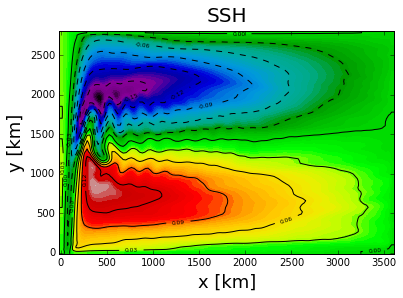

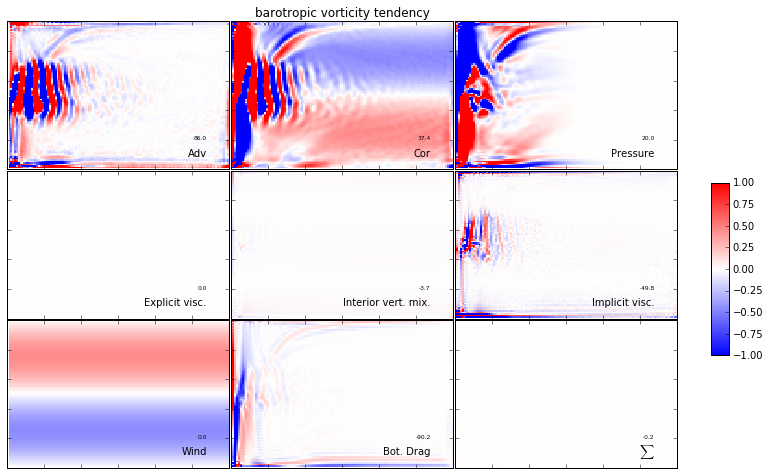

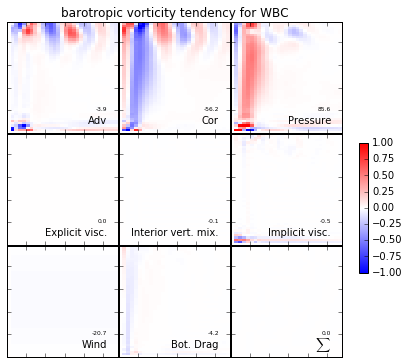

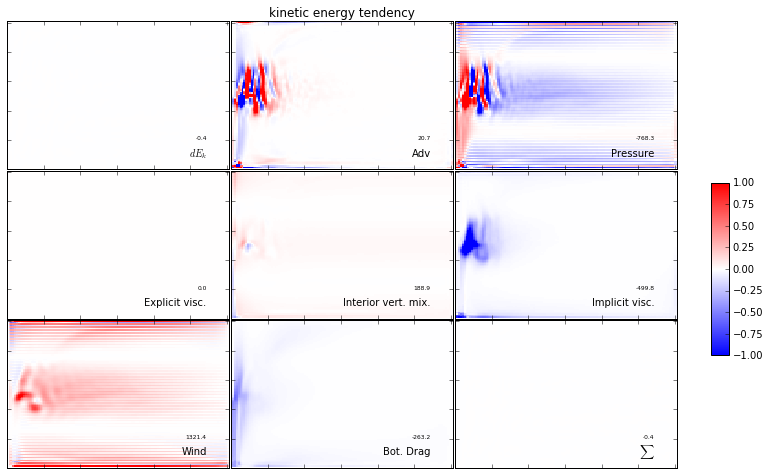

In [120]:
ncfile = folder + 'case14/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case14/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case14/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)

# Case 17: case 12 with different topography (and free-slip)

197.5
averaged between 12.5 and [197.5] years


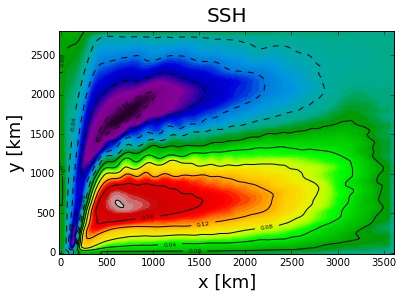

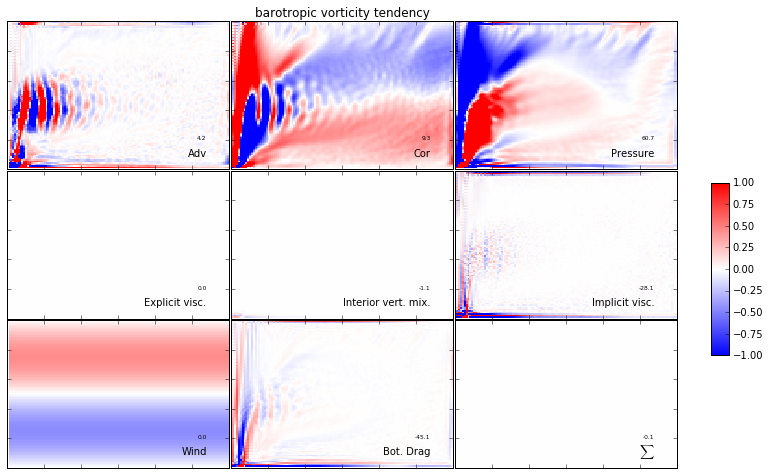

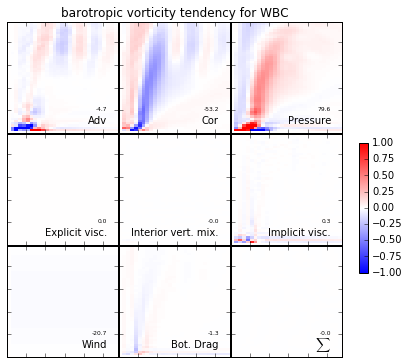

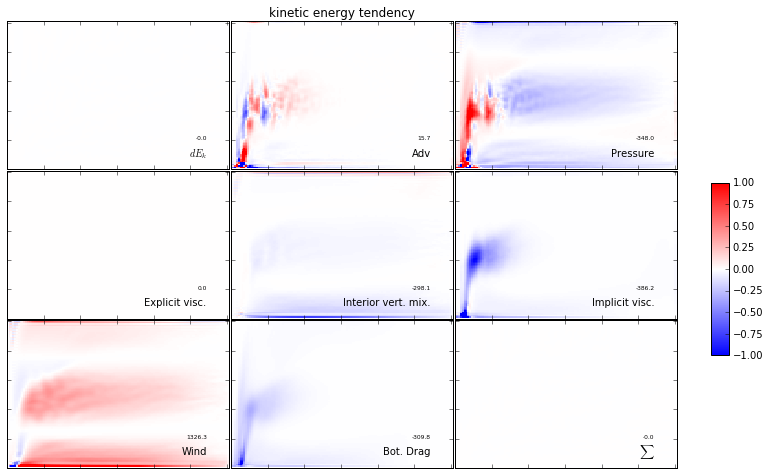

In [121]:
ncfile = folder + 'case17/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case17/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
ncfile = folder + 'case17/basin_diags_ek_avg.nc'
bilan_ke(ncfile,coeflev=1e4)